In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [2]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
    return X, y

In [3]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,10):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [4]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [5]:
# define dataset
X, y = get_dataset()

In [6]:
# get the models to evaluate
models = get_models()

In [7]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


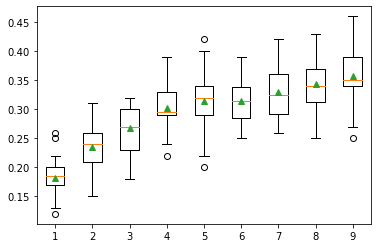

In [8]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()